# Results of Edge Detection Benchmark and Speedup

By: Justin Wijaya

## Serial Experiment

I compiled the serial code on intel16k80 using the following commands:

```
gcc -c main_process.c
gcc -o process -lm -l png16 main_process.o png_util.o
```

For these following experiments, I will be using this image to edge detect:
![alt text](./images/cube.png "Picture of greyscaled cube")


I ran the code 10 times with the command:
```BASH
time ./process images/cube.png test.png
```
I obtained the following results:

0m0.229s
0m0.217s
0m0.215s
0m0.218s
0m0.215s
0m0.225s
0m0.214s
0m0.218s
0m0.216s
0m0.213s

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

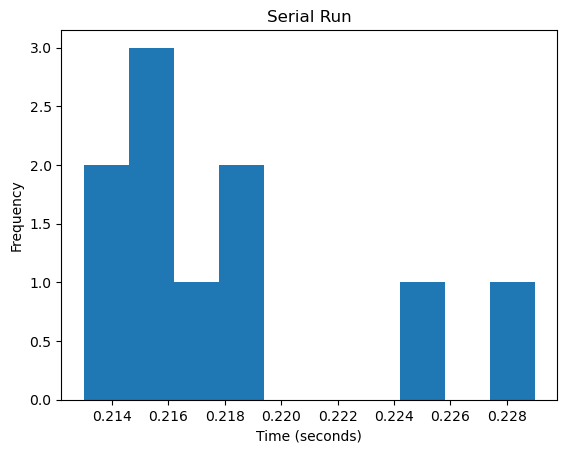

Serial code average runtime: 0.21799999999999997 seconds


In [6]:
tests = [1,2,3,4,5,6,7,8,9,10]
times1 = [.229,.217,.215,.218,.215,.225,.214,.218,.216,.213]
plt.hist(times1)
plt.title("Serial Run")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()
print("Serial code average runtime:",np.average(times1),"seconds")

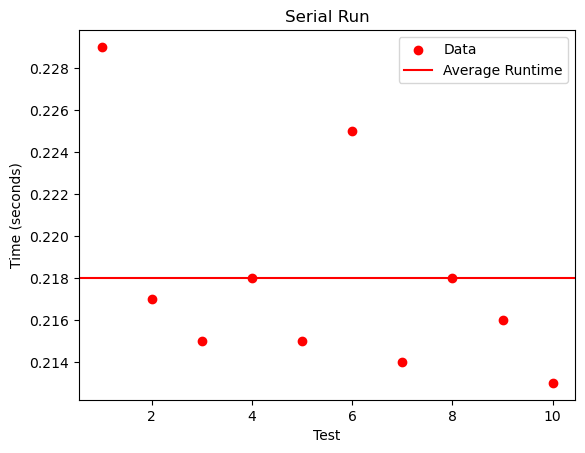

In [7]:
plt.scatter(tests,times1,color="red",label="Data")
plt.axhline(np.average(times1),color="red",label="Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("Serial Run")
plt.legend()
plt.show()

## Code Optimization

* Use different levels of compiler optimization (-O2).
* Change the order of the loops (row and column) for the Average Filter, Gradient Filter and Edge Thresholding. See if the change in order will increase speed due to multiple cache hits.
* Combine the above methods.


change in compiler optimization level
0m0.094s
0m0.083s
0m0.085s
0m0.084s
0m0.080s
0m0.087s
0m0.084s
0m0.081s
0m0.079s
0m0.079s

change in order of loops
0m0.212s
0m0.212s
0m0.205s
0m0.206s
0m0.207s
0m0.218s
0m0.205s
0m0.206s
0m0.205s
0m0.204s

both optimizations
0m0.083s
0m0.078s
0m0.076s
0m0.079s
0m0.079s
0m0.089s
0m0.078s
0m0.075s
0m0.075s
0m0.074s

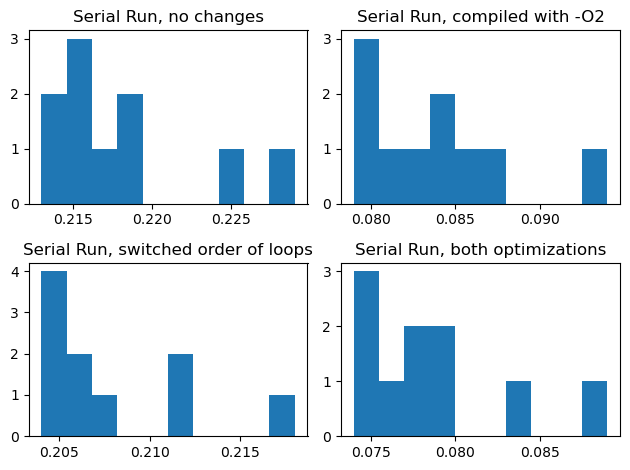

In [10]:
times21 = [.094,.083,.085,.084,.080,.087,.084,.081,.079,.079]
times22 = [.212,.212,.205,.206,.207,.218,.205,.206,.205,.204]
times23 = [.083,.078,.076,.079,.079,.089,.078,.075,.075,.074]
plt.subplot(221)
plt.hist(times1)
plt.title("Serial Run, no changes")
plt.subplot(222)
plt.hist(times21)
plt.title("Serial Run, compiled with -O2")
plt.subplot(223)
plt.hist(times22)
plt.title("Serial Run, switched order of loops")
plt.subplot(224)
plt.hist(times23)
plt.title("Serial Run, both optimizations")
plt.tight_layout()
plt.show()

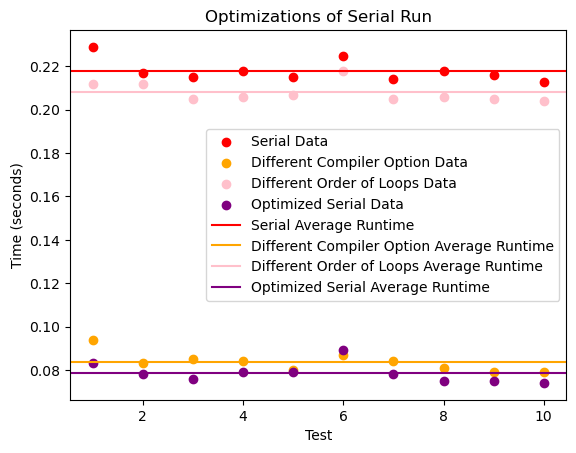

Optimized serial code average runtime: 0.07859999999999999 seconds


In [11]:
plt.scatter(tests,times1,color="red",label="Serial Data")
plt.scatter(tests,times21,color="orange",label="Different Compiler Option Data")
plt.scatter(tests,times22,color="pink",label="Different Order of Loops Data")
plt.scatter(tests,times23,color="purple",label="Optimized Serial Data")
plt.axhline(np.average(times1),color="red",label="Serial Average Runtime")
plt.axhline(np.average(times21),color="orange",label="Different Compiler Option Average Runtime")
plt.axhline(np.average(times22),color="pink",label="Different Order of Loops Average Runtime")
plt.axhline(np.average(times23),color="purple",label="Optimized Serial Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("Optimizations of Serial Run")
plt.legend()
plt.show()
print("Optimized serial code average runtime:",np.average(times23),"seconds")

Using either optimization techniques led to a speed up in the program, with the compiler optimization having a drastically more significant of an effect than with the changing of the order of the row and column loops. Using both at the same time also led to an increase in speed.

## OpenMP Speedup

###Describe what you did to speed up your code using OpenMP###

* Set up a parallel for before loops over rows and columns.
* Utilize reduction in gradient filter's computations.
* Use reduction in average filter as well.


With parallelization
0m0.079s
0m0.078s
0m0.074s
0m0.072s
0m0.076s
0m0.088s
0m0.079s
0m0.078s
0m0.082s
0m0.070s

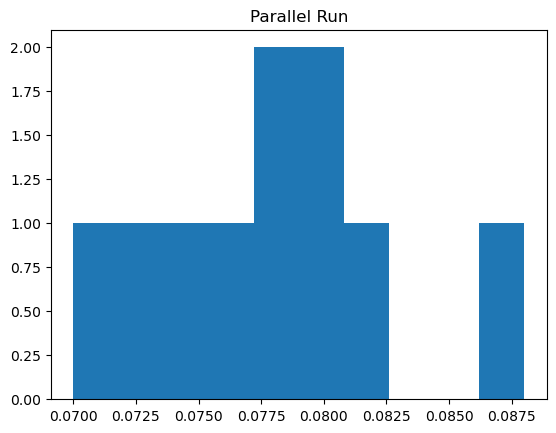

In [15]:
# plot results
times3 = [.079,.078,.074,.072,.076,.088,.079,.078,.082,.070]
plt.hist(times3)
plt.title("Parallel Run")
plt.show()

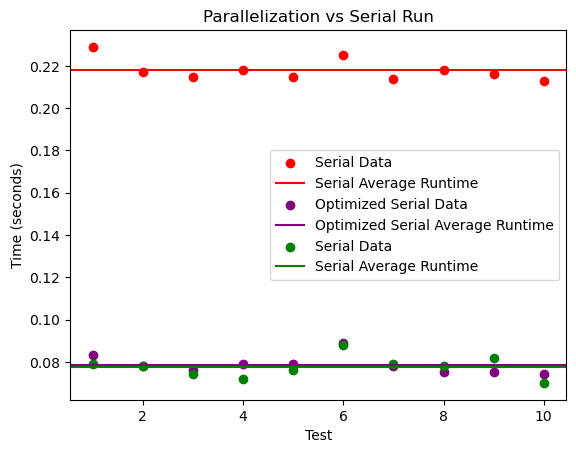

Parallelized code average runtime: 0.07759999999999997 seconds


In [16]:
plt.scatter(tests,times1,color="red",label="Serial Data")
plt.axhline(np.average(times1),color="red",label="Serial Average Runtime")
plt.scatter(tests,times23,color="purple",label="Optimized Serial Data")
plt.axhline(np.average(times23),color="purple",label="Optimized Serial Average Runtime")
plt.scatter(tests,times3,color="green",label="Serial Data")
plt.axhline(np.average(times3),color="green",label="Serial Average Runtime")
plt.xlabel("Test")
plt.ylabel("Time (seconds)")
plt.title("Parallelization vs Serial Run")
plt.legend()
plt.show()
print("Parallelized code average runtime:",np.average(times3),"seconds")

With parallelization, the program runs drastically faster than the original program. It is important to note that the average runtime using OpenMP parallelization is similar to the average runtime using fully optimized serial code.

Another thing to note is that the actual outputs are very similar (if not the same). Here they are for serial, optimized serial, and parallelized program:

![alt text](../test1.png "Edge detector output")
![alt text](../test2.png "Edge detector output")
![alt text](../test3.png "Edge detector output")

## Concluding Discussion

* I learned that they way that you access the data (i.e. by rows then columns vs columns then rows) plays a significant role in the processing speed of a program. I've also learned that fully optimized serial code can have a similar effect in the increase in speed as the parallelized code. One more thing learned was that doing the optimizations correctly shouldn't change the output.
* Using reduction helped speed up the code and maintain proper synchronization. As did scheduling with static.
* What didn't work was placing the statement ```#pragma omp parallel for``` behind every for loop (made it run in ~1.000s as opposed to the original program running in ~0.218s).
* I had trouble with understanding how to compile and benchmark the program correctly. Taking the time to read and understand the makefile was a lesson I learned.

----